In [5]:
import nltk

In [6]:
import re

In [7]:
from nltk.tokenize import word_tokenize

In [8]:
from nltk.probability import FreqDist

In [9]:
import matplotlib.pyplot as plt

ID do corpus

In [75]:
nltk_id = 'genesis'


In [76]:
nltk.download(nltk_id)

[nltk_data] Downloading package genesis to /root/nltk_data...
[nltk_data]   Package genesis is already up-to-date!


True

In [77]:
print(nltk.corpus.genesis.readme())

b'Genesis Corpus\n\nThis corpus has been prepared from several web sources; formatting,\nmarkup and verse numbers have been stripped.\n\nCONTENTS\n\nenglish-kjv.txt - Genesis, King James version (Project Gutenberg)\nenglish-web.txt - Genesis, World English Bible (Project Gutenberg)\nfinnish.txt - Genesis, Suomen evankelis-luterilaisen kirkon kirkolliskokouksen vuonna 1992 k\xe4ytt\xf6\xf6n ottama suomennos\nfrench.txt - Genesis, Louis Segond 1910\ngerman.txt - Genesis, Luther Translation\nlolcat.txt - Genesis, Lolcat version http://www.lolcatbible.com/\nportuguese.txt - Genesis, Brazilian Portuguese version - http://www.bibliaonline.com.br\nswedish.txt - Genesis, Gamla och Nya Testamentet, 1917 (Project Runeberg)\n'


In [81]:
genesis = nltk.corpus.genesis.raw('portuguese.txt')

In [82]:
print(genesis)

No princípio, criou Deus os céus e a terra.
E a terra era sem forma e vazia; e {havia} trevas sobre a face do abismo; e o Espírito de Deus se movia sobre a face das águas.
E disse Deus: Haja luz. E houve luz.
E viu Deus que era boa a luz; e fez Deus separação entre a luz e as trevas.
E Deus chamou à luz Dia; e às trevas chamou Noite. E foi a tarde e a manhã: o dia primeiro.
E disse Deus: Haja uma expansão no meio das águas, e haja separação entre águas e águas.
E fez Deus a expansão e fez separação entre as águas que {estavam} debaixo da expansão e as águas que {estavam} sobre a expansão. E assim foi.
E chamou Deus à expansão Céus; e foi a tarde e a manhã: o dia segundo.
E disse Deus: Ajuntem-se as águas debaixo dos céus num lugar; e apareça a {porção} seca. E assim foi.
E chamou Deus à {porção} seca Terra; e ao ajuntamento das águas chamou Mares. E viu Deus que era bom.
E disse Deus: Produza a terra erva verde, erva que dê semente, árvore frutífera que dê fruto segundo a sua espécie, 

Vamos fazer o seguinte:
* Selecionar apenas letras (remover pontuação, números e outros caracteres)
* Converter o texto para letra minúscula

In [83]:
genesis_letras_min =  re.findall(r'\b[A-zÀ-úü]+\b', genesis.lower())

In [84]:
print(genesis_letras_min)

['no', 'princípio', 'criou', 'deus', 'os', 'céus', 'e', 'a', 'terra', 'e', 'a', 'terra', 'era', 'sem', 'forma', 'e', 'vazia', 'e', 'havia', 'trevas', 'sobre', 'a', 'face', 'do', 'abismo', 'e', 'o', 'espírito', 'de', 'deus', 'se', 'movia', 'sobre', 'a', 'face', 'das', 'águas', 'e', 'disse', 'deus', 'haja', 'luz', 'e', 'houve', 'luz', 'e', 'viu', 'deus', 'que', 'era', 'boa', 'a', 'luz', 'e', 'fez', 'deus', 'separação', 'entre', 'a', 'luz', 'e', 'as', 'trevas', 'e', 'deus', 'chamou', 'à', 'luz', 'dia', 'e', 'às', 'trevas', 'chamou', 'noite', 'e', 'foi', 'a', 'tarde', 'e', 'a', 'manhã', 'o', 'dia', 'primeiro', 'e', 'disse', 'deus', 'haja', 'uma', 'expansão', 'no', 'meio', 'das', 'águas', 'e', 'haja', 'separação', 'entre', 'águas', 'e', 'águas', 'e', 'fez', 'deus', 'a', 'expansão', 'e', 'fez', 'separação', 'entre', 'as', 'águas', 'que', 'estavam', 'debaixo', 'da', 'expansão', 'e', 'as', 'águas', 'que', 'estavam', 'sobre', 'a', 'expansão', 'e', 'assim', 'foi', 'e', 'chamou', 'deus', 'à', 'ex

Agora vamos remover as stopwords, ou seja, as palavras que não possuem valor semântico para a busca (exemplo: artigos e preposições. O NLTK fornece bibliotecas de stopwords para vários idiomas.

In [85]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [86]:
stopwords = nltk.corpus.stopwords.words('portuguese')

In [87]:
print(stopwords)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

In [88]:
list_stopwords_portugues = set(stopwords)
print(list_stopwords_portugues)

{'entre', 'elas', 'esse', 'num', 'estiverem', 'estivessem', 'o', 'aquilo', 'se', 'hei', 'mesmo', 'muito', 'seu', 'nossas', 'serei', 'está', 'qual', 'ou', 'isso', 'dela', 'formos', 'nos', 'houveremos', 'este', 'seja', 'essas', 'terei', 'estivéramos', 'tivesse', 'mas', 'na', 'a', 'em', 'houvera', 'tu', 'à', 'forem', 'fosse', 'quem', 'suas', 'havemos', 'me', 'ser', 'meu', 'sejamos', 'também', 'estivéssemos', 'aos', 'estou', 'sua', 'às', 'aquele', 'tinham', 'no', 'foi', 'estive', 'aqueles', 'houverão', 'houvesse', 'estivermos', 'das', 'esta', 'fui', 'numa', 'lhes', 'dele', 'e', 'as', 'que', 'houverei', 'os', 'tenhamos', 'estivera', 'tém', 'deles', 'estamos', 'como', 'haver', 'tiveram', 'tiverem', 'fossem', 'teríamos', 'houverá', 'do', 'houvéssemos', 'ela', 'houvessem', 'para', 'nosso', 'hajam', 'da', 'você', 'nem', 'estivemos', 'nós', 'somos', 'teriam', 'tivemos', 'fora', 'será', 'serão', 'houvéramos', 'só', 'teve', 'tivéramos', 'aquela', 'tuas', 'tivéssemos', 'estavam', 'sem', 'houvemos',

In [89]:
genesis_letras_min_semstop = [w for w in genesis_letras_min if w not in list_stopwords_portugues]

In [90]:
print(genesis_letras_min_semstop)

['princípio', 'criou', 'deus', 'céus', 'terra', 'terra', 'forma', 'vazia', 'havia', 'trevas', 'sobre', 'face', 'abismo', 'espírito', 'deus', 'movia', 'sobre', 'face', 'águas', 'disse', 'deus', 'luz', 'luz', 'viu', 'deus', 'boa', 'luz', 'fez', 'deus', 'separação', 'luz', 'trevas', 'deus', 'chamou', 'luz', 'dia', 'trevas', 'chamou', 'noite', 'tarde', 'manhã', 'dia', 'primeiro', 'disse', 'deus', 'expansão', 'meio', 'águas', 'separação', 'águas', 'águas', 'fez', 'deus', 'expansão', 'fez', 'separação', 'águas', 'debaixo', 'expansão', 'águas', 'sobre', 'expansão', 'assim', 'chamou', 'deus', 'expansão', 'céus', 'tarde', 'manhã', 'dia', 'segundo', 'disse', 'deus', 'ajuntem', 'águas', 'debaixo', 'céus', 'lugar', 'apareça', 'porção', 'seca', 'assim', 'chamou', 'deus', 'porção', 'seca', 'terra', 'ajuntamento', 'águas', 'chamou', 'mares', 'viu', 'deus', 'bom', 'disse', 'deus', 'produza', 'terra', 'erva', 'verde', 'erva', 'dê', 'semente', 'árvore', 'frutífera', 'dê', 'fruto', 'segundo', 'espécie', 

Também podemos trabalhar com radicais (stemming). Existem duas formas aqui:

*   Stemming - "corta" as palavras usando a raiz como base
*   Lemmatization - reduz as palavras a forma verdadeira da raiz

Exemplo: andando

*   Stemming - anda
*   Lemmatization - andar

Lemmatization é uma função mais complexa, portanto, se o texto for muito grande pode demorar um pouco para executá-la.

O nltk possui duas funções para stemming: Porter (PorterStemmer) e Lancaster (LancasterStemmer). Ele também possui um lemmatizador (WordNetLemmatizer).


In [91]:
porter = nltk.PorterStemmer()

In [92]:
genesis_letras_min_semstop_stem = [porter.stem(t) for t in genesis_letras_min_semstop]

In [93]:
print(genesis_letras_min_semstop_stem)

['princípio', 'criou', 'deu', 'céu', 'terra', 'terra', 'forma', 'vazia', 'havia', 'treva', 'sobr', 'face', 'abismo', 'espírito', 'deu', 'movia', 'sobr', 'face', 'água', 'diss', 'deu', 'luz', 'luz', 'viu', 'deu', 'boa', 'luz', 'fez', 'deu', 'separação', 'luz', 'treva', 'deu', 'chamou', 'luz', 'dia', 'treva', 'chamou', 'noit', 'tard', 'manhã', 'dia', 'primeiro', 'diss', 'deu', 'expansão', 'meio', 'água', 'separação', 'água', 'água', 'fez', 'deu', 'expansão', 'fez', 'separação', 'água', 'debaixo', 'expansão', 'água', 'sobr', 'expansão', 'assim', 'chamou', 'deu', 'expansão', 'céu', 'tard', 'manhã', 'dia', 'segundo', 'diss', 'deu', 'ajuntem', 'água', 'debaixo', 'céu', 'lugar', 'apareça', 'porção', 'seca', 'assim', 'chamou', 'deu', 'porção', 'seca', 'terra', 'ajuntamento', 'água', 'chamou', 'mare', 'viu', 'deu', 'bom', 'diss', 'deu', 'produza', 'terra', 'erva', 'verd', 'erva', 'dê', 'sement', 'árvore', 'frutífera', 'dê', 'fruto', 'segundo', 'espéci', 'cuja', 'sement', 'nela', 'sobr', 'terra'

Vamos ver a frequência de ocorrência dos termos e tentar enxergar diferenças entre o texto processado com e sem stemming.

In [94]:
freq_sem_stem = FreqDist(genesis_letras_min_semstop)
freq_com_stem = FreqDist(genesis_letras_min_semstop_stem)

In [95]:
print("20 palavras mais frequentes sem stem:")
print(freq_sem_stem.most_common(200))

20 palavras mais frequentes sem stem:
[('disse', 401), ('terra', 350), ('senhor', 244), ('deus', 240), ('filhos', 209), ('pai', 200), ('então', 199), ('jacó', 180), ('sobre', 167), ('filho', 163), ('josé', 157), ('abraão', 133), ('eis', 129), ('porque', 128), ('mulher', 123), ('anos', 112), ('toda', 108), ('pois', 103), ('nome', 102), ('casa', 102), ('faraó', 94), ('irmão', 93), ('ti', 84), ('dizendo', 82), ('irmãos', 80), ('isaque', 80), ('todos', 79), ('egito', 77), ('esaú', 77), ('chamou', 76), ('mão', 75), ('face', 74), ('assim', 74), ('todo', 74), ('deu', 74), ('dias', 73), ('mim', 73), ('gerou', 72), ('diante', 70), ('agora', 69), ('olhos', 69), ('porém', 67), ('sete', 66), ('dia', 63), ('filhas', 63), ('tomou', 62), ('lugar', 61), ('varão', 61), ('fez', 60), ('ali', 60), ('abrão', 59), ('semente', 58), ('tudo', 56), ('aconteceu', 55), ('labão', 54), ('porquanto', 49), ('ainda', 48), ('havia', 47), ('significa', 47), ('campo', 46), ('canaã', 46), ('disseram', 45), ('raquel', 44),

In [96]:
print("20 palavras mais frequentes com stem:")
print(freq_com_stem.most_common(200))

20 palavras mais frequentes com stem:
[('diss', 401), ('filho', 372), ('terra', 358), ('deu', 314), ('senhor', 245), ('pai', 211), ('então', 199), ('jacó', 180), ('irmão', 173), ('sobr', 167), ('josé', 157), ('todo', 153), ('mulher', 150), ('ei', 143), ('toda', 137), ('dia', 136), ('abraão', 133), ('porqu', 128), ('ano', 122), ('nome', 111), ('filha', 106), ('casa', 104), ('poi', 103), ('mão', 102), ('faraó', 94), ('ti', 84), ('servo', 83), ('dizendo', 82), ('isaqu', 80), ('egito', 77), ('esaú', 77), ('chamou', 76), ('face', 75), ('assim', 74), ('mim', 73), ('gerou', 72), ('diant', 70), ('agora', 69), ('olho', 69), ('porém', 67), ('sete', 66), ('lugar', 62), ('tomou', 62), ('vosso', 62), ('varão', 61), ('água', 60), ('fez', 60), ('ali', 60), ('abrão', 59), ('sement', 58), ('tudo', 56), ('aconteceu', 55), ('labão', 54), ('príncipe', 52), ('porquanto', 49), ('cidad', 49), ('ainda', 48), ('havia', 47), ('significa', 47), ('campo', 46), ('canaã', 46), ('disseram', 45), ('raquel', 44), ('is

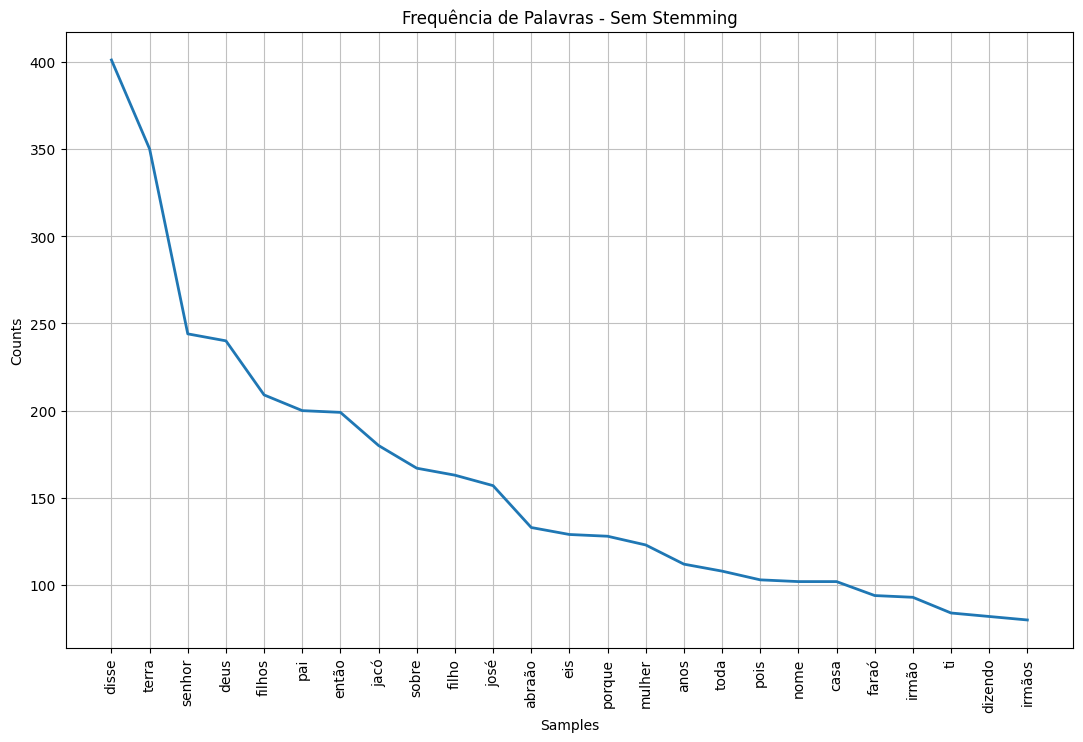

<Axes: title={'center': 'Frequência de Palavras - Sem Stemming'}, xlabel='Samples', ylabel='Counts'>

In [97]:
plt.figure(figsize = (13, 8))
freq_sem_stem.plot(25, title = "Frequência de Palavras - Sem Stemming")

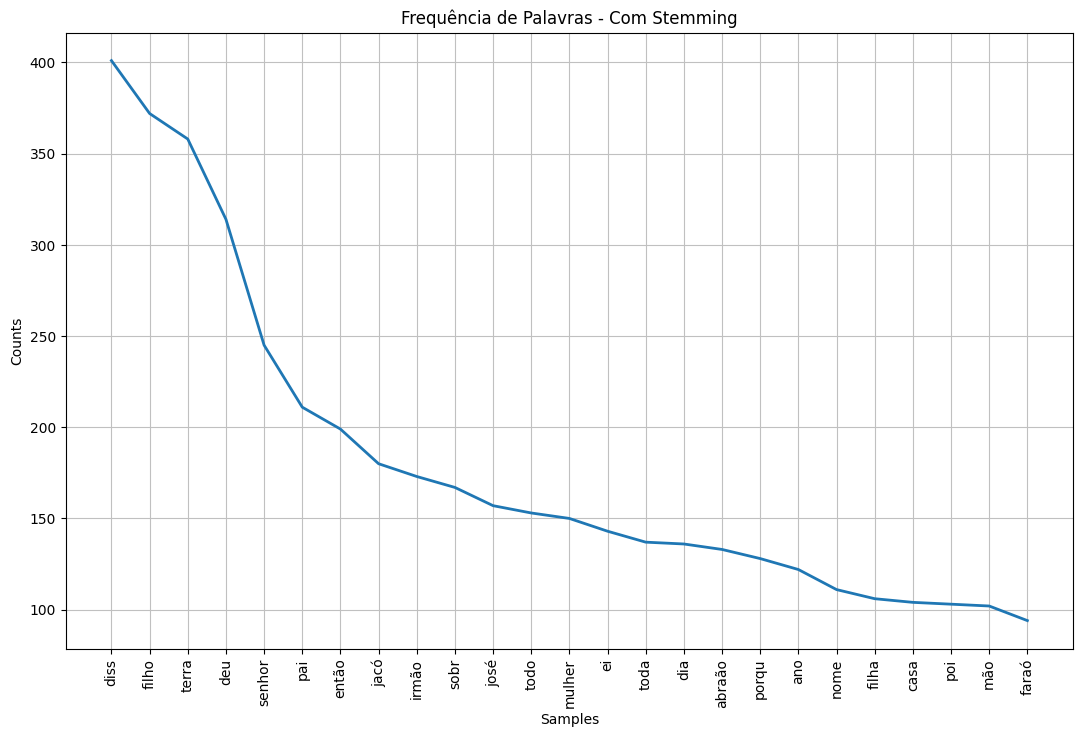

<Axes: title={'center': 'Frequência de Palavras - Com Stemming'}, xlabel='Samples', ylabel='Counts'>

In [98]:
plt.figure(figsize = (13, 8))
freq_com_stem.plot(25, title = "Frequência de Palavras - Com Stemming")